## Finding

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
def show_image(image, title=''):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def draw_rectangle(image, start_point, end_point, color=(0, 255, 0), thickness=3):
    image = image.copy()
    return cv2.rectangle(image, start_point, end_point, color, thickness)

In [3]:
def match_template(
    input_image, template_image, position,
    min_scale, max_scale, num_scales,
    method=cv2.TM_CCOEFF_NORMED,
):
    x, y, w, h = position
    sample = template_image[y: y+h, x:x+w]

    scales = np.linspace(min_scale, max_scale, num_scales)
    positions = []
    scores = []
    for scale in scales:
        resized_sample = cv2.resize(sample, None, fx=scale, fy=scale)
        matching_result = cv2.matchTemplate(input_image, resized_sample, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(matching_result)
        if method == cv2.TM_SQDIFF_NORMED or method == cv2.TM_SQDIFF:
            positions.append([min_loc, (min_loc[0] + resized_sample.shape[1], min_loc[1] + resized_sample.shape[0])])
            scores.append(min_val)
        else:
            positions.append([max_loc, (max_loc[0] + resized_sample.shape[1], max_loc[1] + resized_sample.shape[0])])
            scores.append(max_val)
    return positions, scores

(1829, 2560, 3)


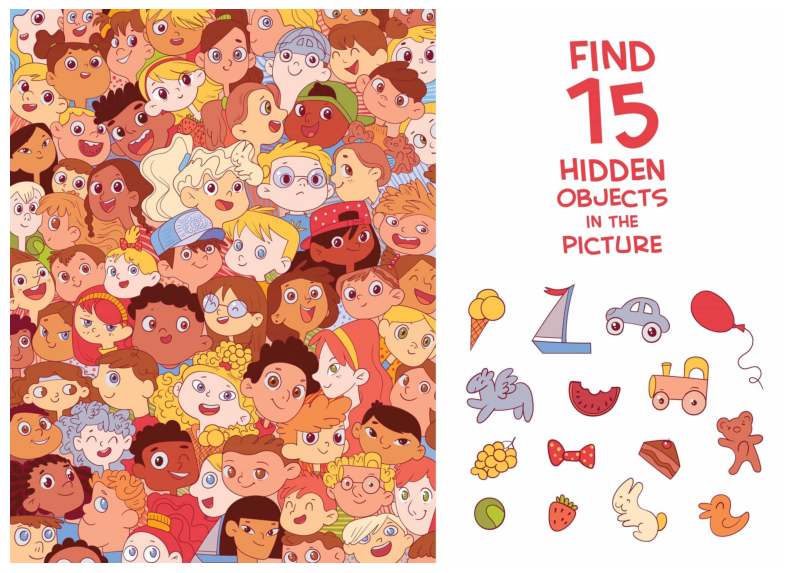

In [11]:
# Load the image
image = cv2.imread('Midterm-ImageSet/Finding/1.jpg')
print(image.shape)
show_image(image)

In [12]:
input_image = cv2.imread('Midterm-ImageSet/Finding/1.jpg')[:, :1410]
template_image = cv2.imread('Midterm-ImageSet/Finding/1.jpg')[:, 1410:]

print(f"Input image shape: {input_image.shape}")
print(f"Template image shape: {template_image.shape}")

Input image shape: (1829, 1410, 3)
Template image shape: (1829, 1150, 3)


In [13]:
objects_positions = [
    # (x, y, w, h)
    (100, 920, 130, 210), # ice cream
    (310, 900, 210, 240), # boat 
    (550, 940, 230, 170), # car
    (830, 920, 190, 160), # balloon
    (90, 1180, 240, 190), # horse
    (430, 1220, 180, 130), # watermelon
    (690, 1140, 210, 210), # train
    (100, 1410, 170, 150), # grapes
    (360, 1410, 170, 120), # bow
    (660, 1410, 160, 150), # cake
    (920, 1320, 160, 220), # bear
    (120, 1610, 110, 110), # ball
    (360, 1600, 110, 130), # strawberry
    (570, 1540, 200, 230), # rabbit
    (860, 1600, 180, 150), # duck
]

In [14]:
input_gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
template_gray_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)

In [15]:
best_positions = []
best_scores = []
for i, (position) in enumerate(objects_positions):
    positions, scores = match_template(
        input_gray_image, template_gray_image, position,
        min_scale=0.5, max_scale=0.8, num_scales=30,
        method=cv2.TM_CCOEFF_NORMED
    )
    best_positions.append(positions[np.argmax(scores)])
    best_scores.append(max(scores))
    print(f"Best score for object {i+1}: {max(scores)}")

Best score for object 1: 0.5252510905265808
Best score for object 2: 0.48501554131507874
Best score for object 3: 0.6833574771881104
Best score for object 4: 0.7056995034217834
Best score for object 5: 0.508918285369873
Best score for object 6: 0.8517818450927734
Best score for object 7: 0.5629779696464539
Best score for object 8: 0.495143324136734
Best score for object 9: 0.6957628726959229
Best score for object 10: 0.672521710395813
Best score for object 11: 0.5746071934700012
Best score for object 12: 0.6144887208938599
Best score for object 13: 0.6046594977378845
Best score for object 14: 0.394968718290329
Best score for object 15: 0.5318758487701416


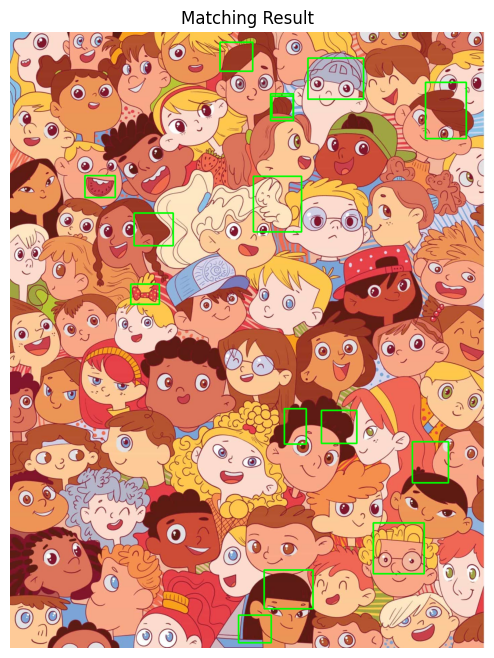

In [16]:
result_image = input_image.copy()
for (start, end) in best_positions:
    result_image = draw_rectangle(result_image, start, end, color=(0, 255, 0), thickness=3)
show_image(result_image, title='Matching Result')

In [17]:
input_edge_image = cv2.Canny(input_gray_image, 100, 200)
template_edge_image = cv2.Canny(template_gray_image, 100, 200)

In [18]:
best_positions = []
best_scores = []
for i, (position) in enumerate(objects_positions):
    positions, scores = match_template(
        input_edge_image, template_edge_image, position,
        min_scale=0.5, max_scale=0.8, num_scales=30,
        method=cv2.TM_CCOEFF_NORMED
    )
    best_positions.append(positions[np.argmax(scores)])
    best_scores.append(max(scores))
    print(f"Best score for object {i+1}: {max(scores)}")

Best score for object 1: 0.3800394833087921
Best score for object 2: 0.3329193890094757
Best score for object 3: 0.5820870995521545
Best score for object 4: 0.29711490869522095
Best score for object 5: 0.4096628427505493
Best score for object 6: 0.34130576252937317
Best score for object 7: 0.5277196168899536
Best score for object 8: 0.48147881031036377
Best score for object 9: 0.23896539211273193
Best score for object 10: 0.3273859918117523
Best score for object 11: 0.4226018190383911
Best score for object 12: 0.46192750334739685
Best score for object 13: 0.3971143066883087
Best score for object 14: 0.43741175532341003
Best score for object 15: 0.5425252318382263


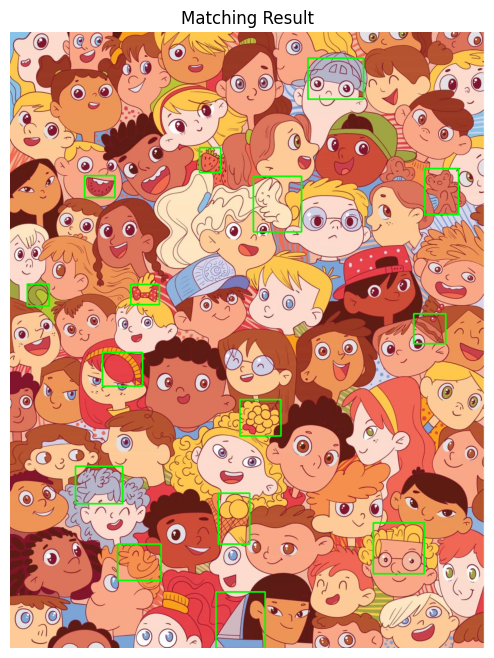

In [19]:
result_image = input_image.copy()
for (start, end) in best_positions:
    result_image = draw_rectangle(result_image, start, end, color=(0, 255, 0), thickness=3)
show_image(result_image, title='Matching Result')

## Counting

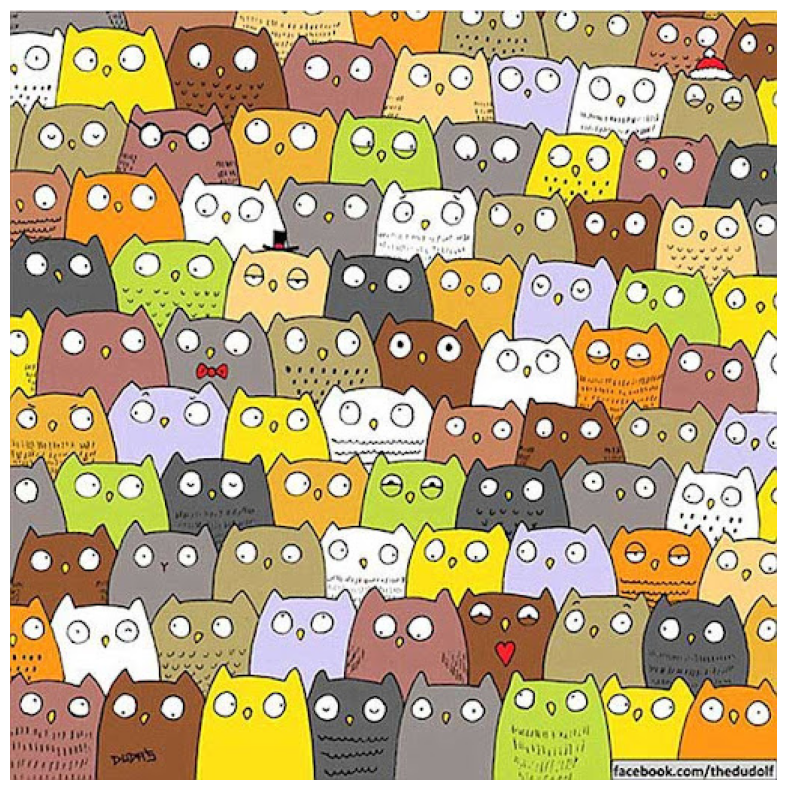

In [12]:
image = cv2.imread('Midterm-ImageSet/Counting/cat.jpg')
show_image(image)